In [1]:
import pandas as pd
from citipy import citipy as cp
import matplotlib.pyplot as plt
from config import weather_api_key, gapi_key
import random
import numpy as np
import requests

In [2]:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

# create sets of random lats and longs
rand_lats = []
rand_longs = []

for x in range(1,1501):
    rand_lats.append(float(random.uniform(-90, 90)))
    rand_longs.append(float(random.uniform(-180,180)))

# Create dataframe to store the data and eventually append cities    
random_coord = pd.DataFrame({
    'Latitude': rand_lats,
    'Longitude': rand_longs
})

In [3]:
# Create list of cities and their countries using Citipy

# Initialize empty series/list
random_coord['City'] = ""
random_coord['Country'] = ""
check_list = []

# For each row, find the nearest unique city at that lat/lng
for index, row in random_coord.iterrows():

    city = cp.nearest_city(random_coord.loc[index, 'Latitude'], random_coord.loc[index, 'Longitude'])
    
    if city.city_name not in check_list: # Find unique cities
        random_coord.loc[index, 'City'] = city.city_name
        random_coord.loc[index, 'Country'] = city.country_code
        check_list.append(city.city_name)
    else:
        random_coord.loc[index, 'City'] = np.nan

In [4]:
random_coord.shape

(1500, 4)

In [5]:
# Drop repeated lat/lng rows that don't have city/country names
random_coord.dropna(inplace=True, how="any", subset=['City'])

In [6]:
# Reset the index so we can print as iterator below
random_coord.reset_index(inplace=True, drop=True)
random_coord.tail()

,Latitude,Longitude,City,Country
592,51.497822,4.319970,bergen op zoom,nl
593,38.446322,-118.112022,fallon,us
594,-21.847817,-169.949006,alofi,nu
595,1.841183,176.023740,rawannawi,ki
596,54.745036,178.298200,beringovskiy,ru


In [7]:
# Replace random coordinates with coordinates for cities themselves
errors = [] # So we can know which rows don't have data

for index, row in random_coord.iterrows():

    city = random_coord.loc[index, 'City']
    country = random_coord.loc[index, 'Country']
    loc_string = f"{city},{country}"
    i = index
    
    target_url = (f'https://maps.googleapis.com/maps/api/geocode/json?address={loc_string}&key={gapi_key}')

    try:
        geo_data = requests.get(target_url).json()
        loc = geo_data['results'][0]['geometry']['location']
        random_coord.loc[index, 'City Latitude'] = loc['lat']
        random_coord.loc[index, 'City Longitude'] = loc['lng']
        print(f"Retrieving location data for {city.title()} - {i}")
    except:
        errors.append(i)
        print(f"ERROR Retrieving location data for {city.title()} - {i}")
        continue      

ERROR Retrieving location data for Huaidian - 0
Retrieving location data for Rikitea - 1
Retrieving location data for College - 2
Retrieving location data for Kodiak - 3
Retrieving location data for Torbay - 4
Retrieving location data for Hofn - 5
Retrieving location data for Avarua - 6
Retrieving location data for Chandbali - 7
Retrieving location data for Rocha - 8
Retrieving location data for Olafsvik - 9
Retrieving location data for Busselton - 10
Retrieving location data for Georgetown - 11
Retrieving location data for Hay River - 12
Retrieving location data for Tuktoyaktuk - 13
Retrieving location data for Gimli - 14
Retrieving location data for Mahebourg - 15
Retrieving location data for Kuche - 16
Retrieving location data for Tomatlan - 17
Retrieving location data for Mount Isa - 18
Retrieving location data for Jamestown - 19
Retrieving location data for Sompeta - 20
Retrieving location data for Westport - 21
Retrieving location data for Hobart - 22
Retrieving location data for

Retrieving location data for Lowestoft - 188
Retrieving location data for Rincon - 189
Retrieving location data for Bichura - 190
Retrieving location data for Manggar - 191
Retrieving location data for Acapulco - 192
Retrieving location data for Kargat - 193
Retrieving location data for Toora-Khem - 194
Retrieving location data for Jalu - 195
Retrieving location data for Santo Antonio Do Sudoeste - 196
ERROR Retrieving location data for Qeshm - 197
Retrieving location data for Los Llanos De Aridane - 198
Retrieving location data for Tucumcari - 199
Retrieving location data for Fernley - 200
Retrieving location data for Honiara - 201
Retrieving location data for Phonhong - 202
Retrieving location data for Bolshaya Sosnova - 203
Retrieving location data for Dombarovskiy - 204
Retrieving location data for Beian - 205
Retrieving location data for Belushya Guba - 206
Retrieving location data for Port Hawkesbury - 207
Retrieving location data for Lorengau - 208
Retrieving location data for W

Retrieving location data for Osoyoos - 369
Retrieving location data for Cap-Aux-Meules - 370
Retrieving location data for Linjiang - 371
Retrieving location data for Hargeysa - 372
Retrieving location data for Nara - 373
ERROR Retrieving location data for Tir Pol - 374
Retrieving location data for Carroll - 375
Retrieving location data for Grand-Santi - 376
Retrieving location data for Morehead - 377
ERROR Retrieving location data for Nieuw Amsterdam - 378
Retrieving location data for Muros - 379
Retrieving location data for Paracatu - 380
Retrieving location data for Louisbourg - 381
ERROR Retrieving location data for Dicabisagan - 382
Retrieving location data for Vestmanna - 383
Retrieving location data for Qiongshan - 384
Retrieving location data for Smithers - 385
Retrieving location data for Abay - 386
Retrieving location data for Cedar City - 387
Retrieving location data for Zhuhai - 388
Retrieving location data for Polson - 389
Retrieving location data for Peniche - 390
Retrievi

Retrieving location data for Maracaibo - 555
Retrieving location data for Maarianhamina - 556
Retrieving location data for Kahului - 557
Retrieving location data for Igrim - 558
Retrieving location data for Luganville - 559
Retrieving location data for Touros - 560
Retrieving location data for Virginia Beach - 561
Retrieving location data for Selma - 562
Retrieving location data for Saint Anthony - 563
Retrieving location data for Kieta - 564
Retrieving location data for Miranorte - 565
Retrieving location data for Lyngseidet - 566
Retrieving location data for Praya - 567
Retrieving location data for Mbandaka - 568
Retrieving location data for Dubti - 569
Retrieving location data for Tarko-Sale - 570
Retrieving location data for Igarka - 571
Retrieving location data for Wenshang - 572
Retrieving location data for Marhaura - 573
Retrieving location data for Grand Island - 574
Retrieving location data for Albury - 575
Retrieving location data for Grand Gaube - 576
Retrieving location dat

In [8]:
## drop rows where city lat/lng not found
random_coord.dropna(inplace=True, how="any", subset=['City Latitude'])

In [9]:
random_coord.tail()

,Latitude,Longitude,City,Country,City Latitude,City Longitude
592,51.497822,4.319970,bergen op zoom,nl,51.494576,4.287162
593,38.446322,-118.112022,fallon,us,39.474869,-118.777041
594,-21.847817,-169.949006,alofi,nu,-19.055371,-169.917871
595,1.841183,176.023740,rawannawi,ki,2.051656,173.263312
596,54.745036,178.298200,beringovskiy,ru,63.065438,179.355123


In [10]:
import time # To respect the Open Weather API
import requests

In [11]:
# Perform a weather check on each of the cities using a series of successive API calls.

# Initialize empty series in weather dataframe
weather = random_coord
weather['Temperature (F)'] = ''
weather['Humidity (%)'] = ''
weather['Cloudiness (%)'] = ''
weather['Wind Speed (mph)'] = ''

In [12]:
# https://openweathermap.org/current
url = "http://api.openweathermap.org/data/2.5/weather?"

# Include a print log of each city as it's being processed with the city number and city name.
for index, row in weather.iterrows():
    i = index
    city = weather.loc[index,'City'].title()
    country = weather.loc[index, 'Country'].upper()
    
    query_url = f"{url}appid={weather_api_key}&q={city},{country}&units=imperial"    
    
    print(f"Checking weather at {city.title()} - {i}")
    
    try:    
        r = requests.get(query_url).json()  
        weather.loc[index, 'Temperature (F)'] = r['main']['temp']
        weather.loc[index, 'Humidity (%)'] = r['main']['humidity']
        weather.loc[index, 'Cloudiness (%)'] = r['clouds']['all']
        weather.loc[index, 'Wind Speed (mph)'] = r['wind']['speed']
    except:
        print(f"Error for {city}")
        continue

    time.sleep(1) # Rate limit to 60 calls per minute

Checking weather at Rikitea - 1
Checking weather at College - 2
Checking weather at Kodiak - 3
Checking weather at Torbay - 4
Checking weather at Hofn - 5
Checking weather at Avarua - 6
Checking weather at Chandbali - 7
Checking weather at Rocha - 8
Checking weather at Olafsvik - 9
Checking weather at Busselton - 10
Checking weather at Georgetown - 11
Checking weather at Hay River - 12
Checking weather at Tuktoyaktuk - 13
Checking weather at Gimli - 14
Checking weather at Mahebourg - 15
Checking weather at Kuche - 16
Error for Kuche
Checking weather at Tomatlan - 17
Checking weather at Mount Isa - 18
Checking weather at Jamestown - 19
Checking weather at Sompeta - 20
Checking weather at Westport - 21
Checking weather at Hobart - 22
Checking weather at Marabba - 23
Checking weather at Ishigaki - 24
Checking weather at Arraial Do Cabo - 25
Checking weather at Cape Town - 26
Checking weather at Nikolskoye - 27
Checking weather at Ushuaia - 28
Checking weather at Najran - 30
Checking weath

Checking weather at Ulverstone - 228
Checking weather at Mecca - 229
Checking weather at Bambous Virieux - 230
Checking weather at Aligudarz - 232
Checking weather at Kaitangata - 233
Checking weather at Sao Filipe - 234
Checking weather at Tasiilaq - 235
Checking weather at Comodoro Rivadavia - 236
Checking weather at Cap Malheureux - 237
Checking weather at Guanica - 238
Error for Guanica
Checking weather at Sataua - 239
Error for Sataua
Checking weather at Marzuq - 240
Error for Marzuq
Checking weather at Severo-Kurilsk - 241
Checking weather at Katsuura - 242
Checking weather at Palabuhanratu - 243
Error for Palabuhanratu
Checking weather at Obo - 244
Checking weather at Klyuchi - 245
Checking weather at Menongue - 246
Checking weather at Batticaloa - 247
Checking weather at Nishihara - 248
Checking weather at Umba - 249
Checking weather at Brokopondo - 250
Checking weather at Narsaq - 251
Checking weather at Fenoarivo Atsinanana - 252
Checking weather at Kruisfontein - 253
Checkin

Checking weather at Altamira - 464
Checking weather at Guadix - 466
Checking weather at Linxi - 467
Checking weather at Konskie - 468
Checking weather at Amazar - 469
Checking weather at Norman Wells - 470
Checking weather at Phan Rang - 471
Error for Phan Rang
Checking weather at Namie - 472
Checking weather at Tungor - 473
Checking weather at Armidale - 474
Checking weather at Upata - 475
Checking weather at Balabac - 476
Checking weather at Haibowan - 477
Error for Haibowan
Checking weather at Pangody - 478
Checking weather at Barroualie - 479
Error for Barroualie
Checking weather at La Union - 480
Checking weather at Bitung - 481
Checking weather at Kota Tinggi - 482
Checking weather at Vao - 483
Checking weather at Coahuayana - 484
Checking weather at Salinopolis - 485
Checking weather at Pangnirtung - 486
Checking weather at San Policarpo - 487
Checking weather at North Bend - 488
Checking weather at Toftir - 489
Error for Toftir
Checking weather at Makakilo City - 490
Checking w

In [13]:
weather.tail()

,Latitude,Longitude,City,Country,City Latitude,City Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
592,51.497822,4.319970,bergen op zoom,nl,51.494576,4.287162,36.48,100,90,2.24
593,38.446322,-118.112022,fallon,us,39.474869,-118.777041,46.62,65,90,5.82
594,-21.847817,-169.949006,alofi,nu,-19.055371,-169.917871,84.2,74,75,18.34
595,1.841183,176.023740,rawannawi,ki,2.051656,173.263312,,,,
596,54.745036,178.298200,beringovskiy,ru,63.065438,179.355123,0.73,95,100,9.26


In [14]:
# Convert API data columns to floats from objects
cols = ['Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']

for c in cols: 
    weather[c] = pd.to_numeric(weather[c], downcast='float')

# Clean up data - drop rows with NaN values
weather.dropna(inplace=True, how="any", subset=['Temperature (F)'])
weather.reset_index(inplace=True, drop=True)

## Export CSV data

In [15]:
# Save a CSV of all retrieved data.
import os

output = 'weather.csv'
path = os.path.join(".", output)

weather.to_csv(path, index=False)

# Print the dataframe counts
weather.count()

Latitude            515
Longitude           515
City                515
Country             515
City Latitude       515
City Longitude      515
Temperature (F)     515
Humidity (%)        515
Cloudiness (%)      515
Wind Speed (mph)    515
dtype: int64

## Showing relationships between latitude and the weather
Your first objective is to build a series of scatter plots to showcase the following relationships:

### Temperature (F) vs. Latitude

In [16]:
# get current date to print on graphs
from datetime import datetime

date = datetime.today().strftime('%Y-%m-%d')

Text(0.5, 1.0, 'Temperature (F) vs. Latitude on 2020-01-23')

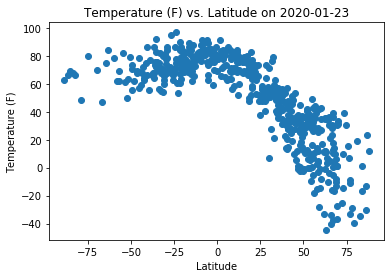

In [17]:
plt.scatter(weather['Latitude'], weather['Temperature (F)'])
plt.xlabel("Latitude")
plt.ylabel('Temperature (F)')
plt.title(f'Temperature (F) vs. Latitude on {date}')

### Humidity (%) vs. Latitude

Text(0.5, 1.0, 'Humidity (%) vs. Latitude on {date}')

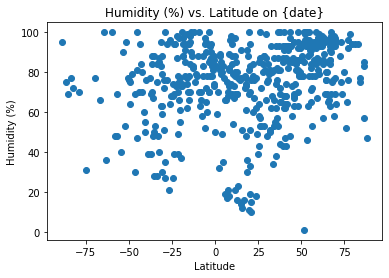

In [18]:
plt.scatter(weather['Latitude'], weather['Humidity (%)'])
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title('Humidity (%) vs. Latitude on {date}')

### Cloudiness (%) vs. Latitude

Text(0.5, 1.0, 'Cloudiness (%) vs. Latitude on {date}')

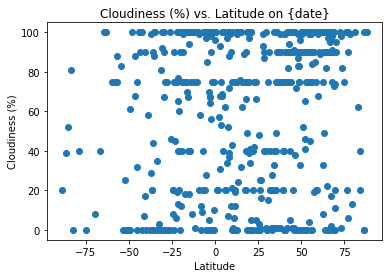

In [19]:
plt.scatter(weather['Latitude'], weather['Cloudiness (%)'])
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Cloudiness (%) vs. Latitude on {date}')

### Wind Speed (mph) vs. Latitude

Text(0.5, 1.0, 'Wind Speed (mph) vs. Latitude on {date}')

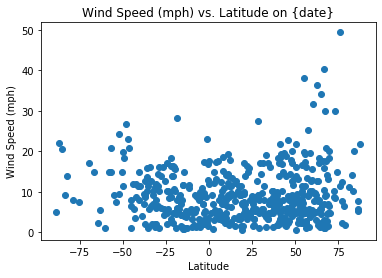

In [20]:
plt.scatter(weather['Latitude'], weather['Wind Speed (mph)'])
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Wind Speed (mph) vs. Latitude on {date}')

## Analyzing Northern vs Southern hemisphere data

In [21]:
# Create hemisphere dataframes
northern = weather[weather['Latitude'] >= 0]
southern = weather[weather['Latitude'] < 0]

In [22]:
from scipy.stats import linregress
import os

### Temperature (F) vs. Latitude

R-squared value for the Northern Hemisphere is: -0.854
R-squared value for the Southern Hemisphere is: 0.428


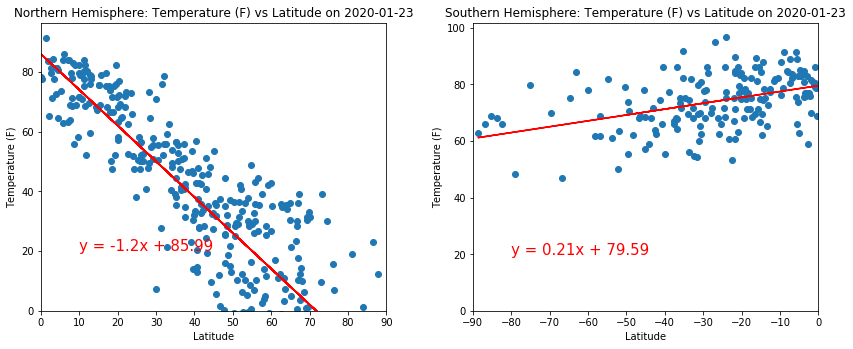

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots

def plot_weather(y, x_offset, y_offset, filename):
    
    # Northern linear regression
    n_x_values = northern['Latitude']
    n_y_values = northern[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(n_x_values, n_y_values) 
    n_regress_values = n_x_values * slope + intercept
    n_r = str(round(rvalue,3))
    n_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Southern linear regression
    s_x_values = southern['Latitude']
    s_y_values = southern[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(s_x_values, s_y_values) 
    s_r = str(round(rvalue,3))
    s_regress_values = s_x_values * slope + intercept
    s_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
    
    print(f"R-squared value for the Northern Hemisphere is: {n_r}")
    print(f"R-squared value for the Southern Hemisphere is: {s_r}")
    
    fig = plt.figure()

    ax1 = fig.add_axes([0, 1.1, 0.8, 1],
                       ylim=(0, 90))
    ax2 = fig.add_axes([1, 1.1, 0.8, 1],
                       ylim=(-25, 90))

    # Add the linear regression equation and line to plot

    # Plot Northern Hemisphere
    ax1.scatter(n_x_values, n_y_values)
    ax1.plot(n_x_values,n_regress_values,"r-")
    ax1.annotate(n_line_eq,(x_offset,y_offset),fontsize=15,color="red") 
    ax1.set_ylim(0,n_y_values.max()+5)
    ax1.set_xlim(0,90)
    ax1.set_xlabel('Latitude')
    ax1.set_ylabel(y)
    ax1.set_title(f'Northern Hemisphere: {y} vs Latitude on {date}')

    # Southern Hemisphere
    ax2.scatter(s_x_values, s_y_values)
    ax2.plot(s_x_values,s_regress_values,"r-")
    ax2.annotate(s_line_eq,(x_offset-90,y_offset),fontsize=15,color="red") 
    ax2.set_ylim(0,s_y_values.max()+5)
    ax2.set_xlim(-90,0)
    ax2.set_xlabel('Latitude')
    ax2.set_ylabel(y)
    ax2.set_title(f'Southern Hemisphere: {y} vs Latitude on {date}')

    # Save plot file
    path = os.path.join(".", "Weather Figures", filename)

    plt.savefig(path, bbox_inches='tight')

plot_weather('Temperature (F)', 10, 20, 'tempvslat.png')

There is a strong negative correlation between latitude and temperature in the Northern Hemisphere—the further you get from the Equator (0), the colder it gets. There is only a moderate positive correlation between temperature and latitude in the Southern Hemisphere, which is currently experiencing Summer. 

### Humidity (%) vs Latitude

R-squared value for the Northern Hemisphere is: 0.358
R-squared value for the Southern Hemisphere is: 0.232


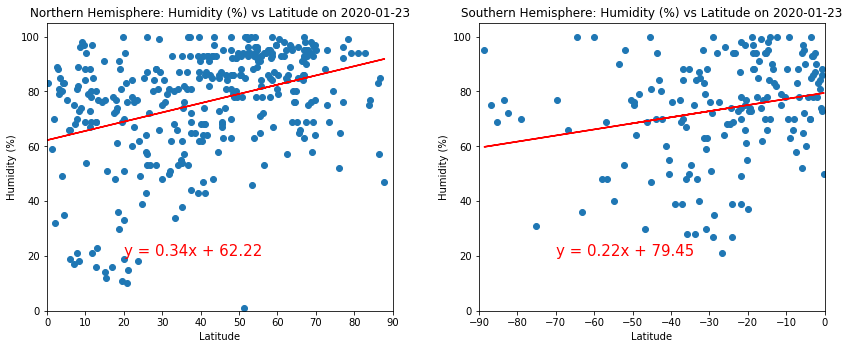

In [24]:
plot_weather('Humidity (%)', 20, 20, 'humidvslat.png')

There is a weak positive correlation between latitude and humidity in the Northern Hemisphere. There is no correlation between humidity and latitude in the Southern Hemisphere.

### Cloudiness (%) vs. Latitude

R-squared value for the Northern Hemisphere is: 0.193
R-squared value for the Southern Hemisphere is: 0.175


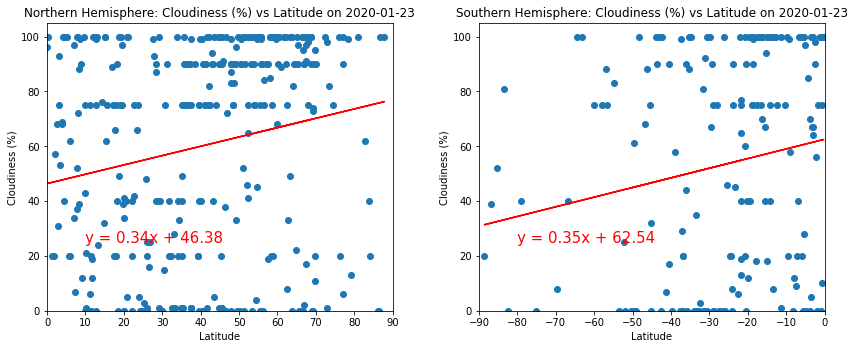

In [25]:
plot_weather('Cloudiness (%)', 10, 25, 'cloudsvslat.png')

There is currently no correlation between cloudiness and latitude in both hemispheres.

### Wind Speed (mph) vs Latitude

R-squared value for the Northern Hemisphere is: 0.146
R-squared value for the Southern Hemisphere is: -0.338


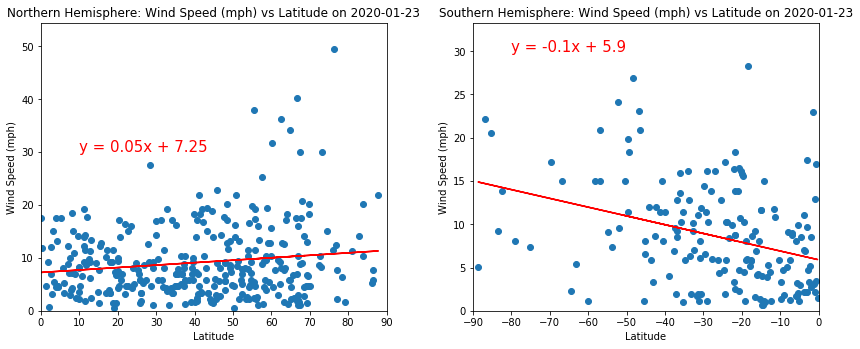

In [26]:
plot_weather('Wind Speed (mph)', 10, 30, 'windvslat.png')

There is no correlation between wind speed and latitude in the Northern Hemisphere. There is a weak negative correlation between wind speed and latitude in the Southern Hemisphere.